In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
rcParams['figure.figsize'] = 8, 6

# Bias Variance Tradeoff (optional)

\begin{align}
    \text{Bias: } y - \mathbb{E}[\hat{y}]
\end{align}

\begin{align}
    \text{Variance: } \mathbb{E}[(\hat{y} - \mathbb{E}[\hat{y}])^{2}]
\end{align}

Show that

\begin{align}
    \text{MSE } = \mathbb{E}[(y-\hat{y})^2] = \text{bias}^2 + \text{variance}
\end{align}

*Hint*: $\frac{1}{N}\sum(y - \hat{y})^2 = \mathbb{E}[(y-\hat{y})^2]$

\begin{align}
    \color{violet}
    \text{MSE } = \mathbb{E}[(y-\hat{y})^2]
\end{align}

\begin{align}
    \color{violet}
    = \mathbb{E}[(y - \mathbb{E}[\hat{y}] - \hat{y} + \mathbb{E}[\hat{y}])^2]
\end{align}

\begin{align}
    \color{violet}
    = \mathbb{E}[(y - \mathbb{E}[\hat{y}])^2] + \mathbb{E}[(\mathbb{E}[\hat{y}] - \hat{y})^2]
\end{align}

\begin{align}
    \color{violet}
    = (y - \mathbb{E}[\hat{y}])^2 + \mathbb{E}[(\hat{y} - \mathbb{E}[\hat{y}])^2]
\end{align}

\begin{align}
    \color{violet}
    = \text{bias}^2 + \text{variance}
\end{align}

In [130]:
# TODO: bias
def bias(y, avg_pred):
    return np.mean(pow(y - avg_pred, 2))
    # return avg_pred - y

# TODO: variance
def variance(preds):
    return np.mean(pow((preds - np.mean(preds)), 2))

def mse(y,pred):
    return np.mean(pow((y - pred), 2))

def rmse(mse):
    return np.sqrt(mse)

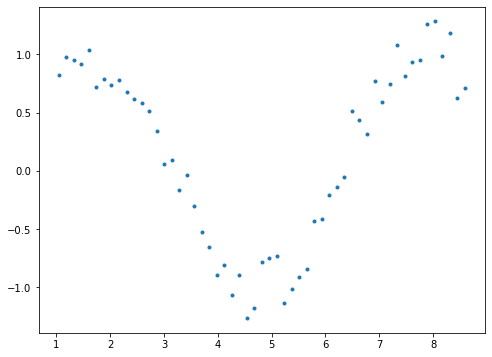

In [50]:
np.random.seed(15)
x = np.array([i*np.pi/180 for i in range(60,500,8)])
y = np.sin(x) + np.random.normal(0,0.15,len(x))
curve = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(curve['x'],curve['y'],'.')

In [4]:
def fit_poly( degree ):
    p = np.polyfit( curve.x, curve.y, deg = degree )
    curve['fit'] = np.polyval( p, curve.x )
    sn.regplot( curve.x, curve.y, fit_reg = False )
    return plt.plot( curve.x, curve.fit, label='fit' )

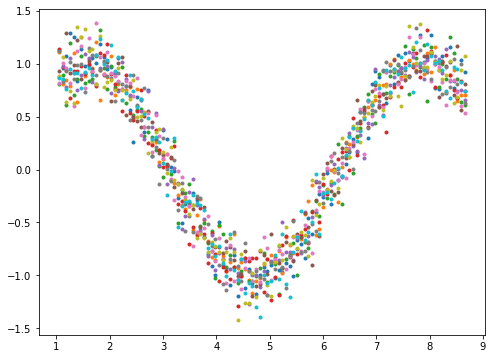

In [150]:
dataset = []

x = np.array([i*np.pi/180 for i in range(60,500,4)])
for i in range(10):
    np.random.seed(i)
    y = np.sin(x) + np.random.normal(0,0.15,len(x))
    curve = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
    plt.plot(curve['x'],curve['y'],'.')
    train_X, test_X, train_y, test_y = train_test_split( curve.x,
                                                  curve.y,
                                                  test_size = 0.40,
                                                  random_state = 100 )
    dataset.append([train_X, test_X, train_y, test_y])

y_gt = np.sin(x)

In [153]:
rmse_df = pd.DataFrame( columns = ["degree", "error_test", "bias", "variance", "s"] )

for degree in range( 1, 20 ):
    _mse = [] 
    _pred = []
    
    for data in dataset:
        train_X, test_X, train_y, test_y = data 
        p = np.polyfit( train_X, train_y, deg = degree ) # training
        pred = np.polyval( p, test_X ) # predicting
        _pred.append(pred)
        _mse.append(mse(test_y, pred))

    gt = np.sin(test_X)
    avg_pred = np.mean(_pred,0)
    b = bias(gt, avg_pred)
    v = np.mean(variance(_pred))
    error = _mse[-1]
    rmse_df.loc[degree-1] = [ degree,
                      error,
                      b,
                      v,
                      b+v
                      ]



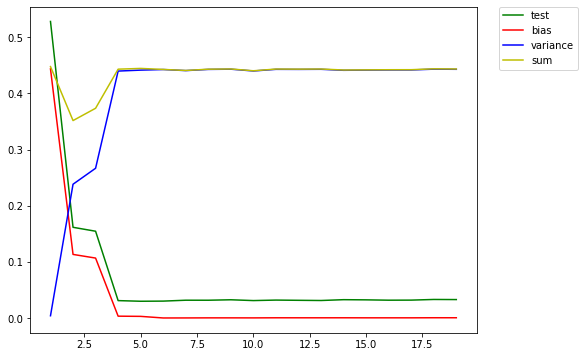

In [154]:
# plt.plot( rmse_df.degree,
#        rmse_df.rmse_train,
#        label='train',
#        color = 'r' )

plt.plot( rmse_df.degree,
       rmse_df.error_test,
       label='test',
       color = 'g' )

plt.plot( rmse_df.degree,
       rmse_df.bias,
       label='bias',
       color = 'r' )

plt.plot( rmse_df.degree,
       rmse_df.variance,
       label='variance',
       color = 'b' )

       
plt.plot( rmse_df.degree,
       rmse_df.s,
       label='sum',
       color = 'y' )

plt.legend(bbox_to_anchor=(1.05, 1),
         loc=2,
         borderaxespad=0.)

In [ ]:
for trainSet in range(0,10):
    fity, mse = returnFM(degree, trainSet)
    mseArray.append(mse)
    fitArray.append(fity)
    diffArray.append(fity-test_set_Y)
diffArray = None
diffArray = np.transpose(diffArray)
currMSE = np.mean(mseArray)
currVARIANCE = np.mean((fitArray-np.mean(fitArray,0))**2)
currBIASSQ = np.mean(np.mean(diffArray,1)**2)
currBIAS = np.mean(abs(np.mean(diffArray,1)))

In [99]:
import warnings
warnings.filterwarnings('ignore')